<a href="https://colab.research.google.com/github/macscheffer/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module1-scrape-and-process-data/LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2018 talks

In [0]:
url = 'https://us.pycon.org/2018/schedule/talks/list/'

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

### 2. List Comprehension

### 3. Filter with named function

### 4. Filter with anonymous function

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

### long title

### first letter

### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [0]:
!pip install textstat

## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

Titles sorted reverse alphabetically

### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

Percentage of talks with long titles

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

Histogram of title lengths, in characters

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count
- description grade level (use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** these questions:
- Which descriptions could fit in a tweet?
- What's the distribution of grade levels? Plot a histogram.



In [0]:
import requests
import bs4

url = 'https://us.pycon.org/2018/schedule/talks/list/'
result = requests.get(url)
soup = bs4.BeautifulSoup(result.text)

In [0]:
soup.select('.presentation-description')[0].text.strip()

In [0]:
descriptions = [tag.text.strip() for tag in soup.select('.presentation-description')]
titles = [tag.text.strip() for tag in soup.select('h2')]
len(descriptions), len(titles)

In [0]:
import pandas as pd
pd.options.display.max_colwidth = 200

In [0]:
df = pd.DataFrame({'description':descriptions})
df.head()

In [0]:
df['description char count'] = df.description.apply(len)
df.head()

In [0]:
!pip install textstat

In [0]:
import textstat

# use textstat to count words.

df['description word count'] = df.description.apply(textstat.lexicon_count)
df.head()

In [0]:
# readability by grade level using the Flesh-Kincaid grade level
# FK grade levels 0-18
# 0-6: Basic, 7-12: Average, 12-18: Skilled
df['description FK grade level'] = df.description.apply(textstat.flesch_kincaid_grade)
df.head()

In [0]:
# looks like we have one value that is way too high. might want to categorize them.
df['description FK grade level'].describe()

In [0]:
import numpy as np
criteria = [((df['description FK grade level'] >= 0) & (df['description FK grade level'] < 6)),
            ((df['description FK grade level'] >= 6) & (df['description FK grade level'] < 12)),
            ((df['description FK grade level'] >= 12))]
values = ['Basic', 'Average', 'Skilled']

df['description FK category'] = np.select(criteria,values)
df.head()

In [0]:
df['description FK category'].value_counts().plot.barh(title='Counts for each FK category');

In [41]:
df.describe()

,description char count,description word count,description FK grade level
count,95.000000,95.000000,95.000000
mean,846.063158,134.578947,18.117895
std,450.107713,70.019082,15.835652
min,201.000000,35.000000,3.700000
25%,550.000000,91.500000,10.500000
50%,758.000000,119.000000,13.800000
75%,978.000000,149.500000,17.950000
max,2794.000000,436.000000,107.800000


In [45]:
list(df['description'][df['description char count'] < 280])[0]

'A function is a small chunk of code that does useful work. Your job when writing a function is to do it in a way that it easy to read. Based on over 15 years of code reviews here are some tips and guidelines I give again and again.'

In [0]:
df['tweetable description'] = df['description char count'] <= 280

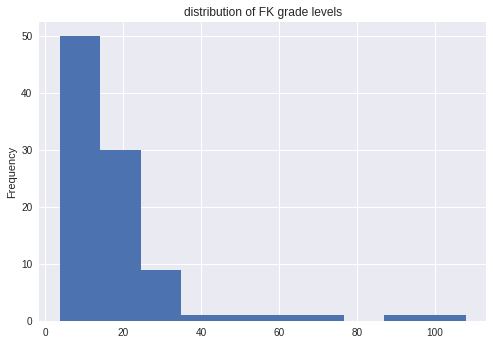

In [50]:
df['description FK grade level'].plot.hist(title='distribution of FK grade levels');